# Rain and CSO Data Preparation

## Rain Dataset

In [71]:
import os
import json
import pandas as pd
import bng_latlon as bl
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dir_store_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/temporary results"
dir_further_features_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/further_features"

In [18]:
raw_rain_sites_df = pd.read_excel(os.path.join(dir_further_features_path, "Rainfall API Thames.xlsx"), sheet_name="Playing with data")
raw_deptford_df = pd.read_excel(os.path.join(dir_further_features_path, "Rainfall API Thames.xlsx"), sheet_name="Deptford")
raw_holland_park_df = pd.read_excel(os.path.join(dir_further_features_path, "Rainfall API Thames.xlsx"), sheet_name="Holland Park")
raw_putney_heath_df = pd.read_excel(os.path.join(dir_further_features_path, "Rainfall API Thames.xlsx"), sheet_name="Putney Heath")
raw_hogsmill_valley_df = pd.read_excel(os.path.join(dir_further_features_path, "Rainfall API Thames.xlsx"), sheet_name="Hogsmill Valley")

### Rain Sites

In [19]:
rain_sites_df = raw_rain_sites_df.copy()

# Date and Time adjustments
rain_sites_df["Latest Data"] = pd.to_datetime(rain_sites_df["Latest Data"])
rain_sites_df["Date"] = rain_sites_df["Latest Data"].dt.date
rain_sites_df["Time"] = rain_sites_df["Latest Data"].dt.time

date_col = rain_sites_df.pop("Date")
time_col = rain_sites_df.pop("Time")

rain_sites_df.insert(2, "Date", date_col)
rain_sites_df.insert(3, "Time", time_col)

rain_sites_df = rain_sites_df.drop(columns=["Latest Data"])

# Location adjustments
rain_sites_df["Lat"] = rain_sites_df["Location"].str.split(",").str[0]
rain_sites_df["Lon"] = rain_sites_df["Location"].str.split(",").str[1]

lat_col = rain_sites_df.pop("Lat")
lon_col = rain_sites_df.pop("Lon")

rain_sites_df.insert(4, "Lat", lat_col)
rain_sites_df.insert(5, "Lon", lon_col)

rain_sites_df = rain_sites_df.drop(columns=["Location"])

In [20]:
rain_sites_df

,Site,Date,Time,Lat,Lon,Rainfall (past 15 minutes)
0,Deptford,2023-11-17,06:15:00,51.476541,-0.017866,0
1,Holland Park,2023-11-17,08:30:00,51.501145,-0.205547,0
2,Putney Heath,2023-11-17,08:30:00,51.449283,-0.224851,0
3,Hogsmill Valley,2023-11-17,08:30:00,51.400709,-0.284238,0


### Deptford Site

In [21]:
deptford_df = raw_deptford_df.copy()

# Date and Time adjustments
deptford_df["DateTime"] = pd.to_datetime(deptford_df["DateTime"])
deptford_df["Date"] = deptford_df["DateTime"].dt.date
deptford_df["Time"] = deptford_df["DateTime"].dt.time

date_col = deptford_df.pop("Date")
time_col = deptford_df.pop("Time")

deptford_df.insert(2, "Date", date_col)
deptford_df.insert(3, "Time", time_col)

deptford_df = deptford_df.drop(columns=["DateTime"])

deptford_df.rename(columns={"Rainfall": "Rainfall (mm)"}, inplace=True)
deptford_df.drop(columns=["unit", "period_s"], inplace=True)

deptford_df

,Station_ID,Date,Time,Rainfall (mm)
0,289102TP,2023-03-11,18:00:00,0.0
1,289102TP,2023-03-11,18:15:00,0.0
2,289102TP,2023-03-11,18:30:00,0.2
3,289102TP,2023-03-11,18:45:00,0.0
4,289102TP,2023-03-11,19:00:00,0.0
...,...,...,...,...
22678,289102TP,2023-11-17,05:15:00,0.0
22679,289102TP,2023-11-17,05:30:00,0.0
22680,289102TP,2023-11-17,05:45:00,0.0
22681,289102TP,2023-11-17,06:00:00,0.0


### Holland Park Site

In [22]:
holland_park_df = raw_holland_park_df.copy()

# Date and Time adjustments
holland_park_df["DateTime"] = pd.to_datetime(holland_park_df["DateTime"])
holland_park_df["Date"] = holland_park_df["DateTime"].dt.date
holland_park_df["Time"] = holland_park_df["DateTime"].dt.time

date_col = holland_park_df.pop("Date")
time_col = holland_park_df.pop("Time")

holland_park_df.insert(2, "Date", date_col)
holland_park_df.insert(3, "Time", time_col)

holland_park_df = holland_park_df.drop(columns=["DateTime"])

holland_park_df.rename(columns={"Rainfall": "Rainfall (mm)"}, inplace=True)
holland_park_df.drop(columns=["unit", "period_s"], inplace=True)

holland_park_df

,Station_ID,Date,Time,Rainfall (mm)
0,246424TP,2023-03-11,18:15:00,0.0
1,246424TP,2023-03-11,18:30:00,0.0
2,246424TP,2023-03-11,19:00:00,0.4
3,246424TP,2023-03-11,19:15:00,0.4
4,246424TP,2023-03-11,19:30:00,0.0
...,...,...,...,...
22433,246424TP,2023-11-17,07:30:00,0.0
22434,246424TP,2023-11-17,07:45:00,0.0
22435,246424TP,2023-11-17,08:00:00,0.0
22436,246424TP,2023-11-17,08:15:00,0.0


### Putney Heath Site

In [23]:
putney_heath_df = raw_putney_heath_df.copy()

# Date and Time adjustments
putney_heath_df["DateTime"] = pd.to_datetime(putney_heath_df["DateTime"])
putney_heath_df["Date"] = putney_heath_df["DateTime"].dt.date
putney_heath_df["Time"] = putney_heath_df["DateTime"].dt.time

date_col = putney_heath_df.pop("Date")
time_col = putney_heath_df.pop("Time")

putney_heath_df.insert(2, "Date", date_col)
putney_heath_df.insert(3, "Time", time_col)

putney_heath_df = putney_heath_df.drop(columns=["DateTime"])

putney_heath_df.rename(columns={"Rainfall": "Rainfall (mm)"}, inplace=True)

putney_heath_df.drop(columns=["unit", "period_s"], inplace=True)

putney_heath_df

,Station_ID,Date,Time,Rainfall (mm)
0,287283TP,2023-03-11,18:30:00,0.1
1,287283TP,2023-03-11,18:45:00,0.0
2,287283TP,2023-03-11,19:00:00,0.0
3,287283TP,2023-03-11,19:15:00,0.2
4,287283TP,2023-03-11,19:30:00,0.0
...,...,...,...,...
22840,287283TP,2023-11-17,07:30:00,0.0
22841,287283TP,2023-11-17,07:45:00,0.0
22842,287283TP,2023-11-17,08:00:00,0.0
22843,287283TP,2023-11-17,08:15:00,0.0


### Hogsmill Valley Site

In [24]:
hogsmill_valley_df = raw_hogsmill_valley_df.copy()

# Date and Time adjustments
hogsmill_valley_df["DateTime"] = pd.to_datetime(hogsmill_valley_df["DateTime"])
hogsmill_valley_df["Date"] = hogsmill_valley_df["DateTime"].dt.date
hogsmill_valley_df["Time"] = hogsmill_valley_df["DateTime"].dt.time

date_col = hogsmill_valley_df.pop("Date")
time_col = hogsmill_valley_df.pop("Time")

hogsmill_valley_df.insert(2, "Date", date_col)
hogsmill_valley_df.insert(3, "Time", time_col)

hogsmill_valley_df = hogsmill_valley_df.drop(columns=["DateTime"])

hogsmill_valley_df.rename(columns={"Rainfall": "Rainfall (mm)"}, inplace=True)

hogsmill_valley_df.drop(columns=["unit", "period_s"], inplace=True)

hogsmill_valley_df

,Station_ID,Date,Time,Rainfall (mm)
0,286392TP,2023-03-11,18:30:00,0.0
1,286392TP,2023-03-11,18:45:00,0.0
2,286392TP,2023-03-11,19:00:00,0.0
3,286392TP,2023-03-11,19:15:00,0.1
4,286392TP,2023-03-11,19:30:00,0.1
...,...,...,...,...
22839,286392TP,2023-11-17,07:30:00,0.0
22840,286392TP,2023-11-17,07:45:00,0.0
22841,286392TP,2023-11-17,08:00:00,0.0
22842,286392TP,2023-11-17,08:15:00,0.0


## Merge Data

In [25]:
deptford_df.insert(0, "Site", "Deptford")
holland_park_df.insert(0, "Site", "Holland Park")
putney_heath_df.insert(0, "Site", "Putney Heath")
hogsmill_valley_df.insert(0, "Site", "Hogsmill Valley")

In [26]:
deptford_df.insert(
    2,
    "Lat",
    rain_sites_df.loc[rain_sites_df["Site"] == "Deptford", "Lat"].values[0],
)
deptford_df.insert(
    3,
    "Lon",
    rain_sites_df.loc[rain_sites_df["Site"] == "Deptford", "Lon"].values[0],
)

holland_park_df.insert(
    2,
    "Lat",
    rain_sites_df.loc[rain_sites_df["Site"] == "Holland Park", "Lat"].values[0],
)
holland_park_df.insert(
    3,
    "Lon",
    rain_sites_df.loc[rain_sites_df["Site"] == "Holland Park", "Lon"].values[0],
)

putney_heath_df.insert(
    2,
    "Lat",
    rain_sites_df.loc[rain_sites_df["Site"] == "Putney Heath", "Lat"].values[0],
)
putney_heath_df.insert(
    3,
    "Lon",
    rain_sites_df.loc[rain_sites_df["Site"] == "Putney Heath", "Lon"].values[0],
)

hogsmill_valley_df.insert(
    2,
    "Lat",
    rain_sites_df.loc[rain_sites_df["Site"] == "Hogsmill Valley", "Lat"].values[0],
)
hogsmill_valley_df.insert(
    3,
    "Lon",
    rain_sites_df.loc[rain_sites_df["Site"] == "Hogsmill Valley", "Lon"].values[0],
)

In [27]:
full_df = pd.concat(
    [deptford_df, holland_park_df, putney_heath_df, hogsmill_valley_df]
).reset_index(drop=True)

full_df

,Site,Station_ID,Lat,Lon,Date,Time,Rainfall (mm)
0,Deptford,289102TP,51.476541,-0.017866,2023-03-11,18:00:00,0.0
1,Deptford,289102TP,51.476541,-0.017866,2023-03-11,18:15:00,0.0
2,Deptford,289102TP,51.476541,-0.017866,2023-03-11,18:30:00,0.2
3,Deptford,289102TP,51.476541,-0.017866,2023-03-11,18:45:00,0.0
4,Deptford,289102TP,51.476541,-0.017866,2023-03-11,19:00:00,0.0
...,...,...,...,...,...,...,...
90805,Hogsmill Valley,286392TP,51.400709,-0.284238,2023-11-17,07:30:00,0.0
90806,Hogsmill Valley,286392TP,51.400709,-0.284238,2023-11-17,07:45:00,0.0
90807,Hogsmill Valley,286392TP,51.400709,-0.284238,2023-11-17,08:00:00,0.0
90808,Hogsmill Valley,286392TP,51.400709,-0.284238,2023-11-17,08:15:00,0.0


In [28]:
full_df.to_csv(os.path.join(dir_store_path, "rainfall_dataset.csv"), index=False)

# CSO Dataset

In [29]:
cso_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/sewer_london/CSO_buffer.xlsx"

In [30]:
raw_cso_df = pd.read_excel(os.path.join(dir_further_features_path, "Thames Water Historic Discharges by site (missing fleet main before 2023).xlsx"), header=None)
cso_50_df = pd.read_excel(cso_path, sheet_name="50 km")
cso_20_df = pd.read_excel(cso_path, sheet_name="20 km")

In [31]:
raw_cso_df

,0
0,"{""meta"": {""publisher"": ""Thames Water Utilities..."
1,"{""meta"": {""publisher"": ""Thames Water Utilities..."
2,"{""meta"": {""publisher"": ""Thames Water Utilities..."
3,"{""meta"": {""publisher"": ""Thames Water Utilities..."
4,"{""meta"": {""publisher"": ""Thames Water Utilities..."
...,...
4171,"{""meta"": {""publisher"": ""Thames Water Utilities..."
4172,"{""meta"": {""publisher"": ""Thames Water Utilities..."
4173,"{""meta"": {""publisher"": ""Thames Water Utilities..."
4174,"{""meta"": {""publisher"": ""Thames Water Utilities..."


In [32]:
json.loads(raw_cso_df.loc[6,0])

{'meta': {'publisher': 'Thames Water Utilities Limited',
  'licence': 'https://data.thameswater.co.uk/s/terms-of-service',
  'documentation': 'https://data.thameswater.co.uk',
  'version': '1.0.2',
  'limit': '1000'},
 'items': [{'LocationName': 'Aldermaston',
   'PermitNumber': 'TEMP.2345',
   'LocationGridRef': 'SU59126551',
   'X': 459120,
   'Y': 165510,
   'ReceivingWaterCourse': 'Groundwater',
   'AlertType': 'Stop',
   'DateTime': '2023-01-18T21:30:00'},
  {'LocationName': 'Aldermaston',
   'PermitNumber': 'TEMP.2345',
   'LocationGridRef': 'SU59126551',
   'X': 459120,
   'Y': 165510,
   'ReceivingWaterCourse': 'Groundwater',
   'AlertType': 'Start',
   'DateTime': '2023-01-18T21:00:00'},
  {'LocationName': 'Aldermaston',
   'PermitNumber': 'TEMP.2345',
   'LocationGridRef': 'SU59126551',
   'X': 459120,
   'Y': 165510,
   'ReceivingWaterCourse': 'Groundwater',
   'AlertType': 'Stop',
   'DateTime': '2023-01-18T18:45:00'},
  {'LocationName': 'Aldermaston',
   'PermitNumber': 'T

In [33]:
def check_alternates(df):
    df['IsStart'] = df['AlertType'] == 'Start'
    df['Alternates'] = df['IsStart'] != df['IsStart'].shift()

In [34]:
df_list = []
eval_df_list = []

for _, row in raw_cso_df.iterrows():
    cso_dict = json.loads(row[0])
    if "items" in cso_dict.keys():
        if len(cso_dict["items"]) > 1:
            temp_df = pd.DataFrame(cso_dict["items"])
            temp_df["AlertType"].replace(
                {
                    "Offline start": "Start",
                    "Offline stop": "Stop",
                },
                inplace=True,
            )
            temp_df['LocationName'].replace(',', ' - ', regex=True, inplace=True)
            temp_df.drop(["PermitNumber", "LocationGridRef"], axis=1, inplace=True)
            df_list.append(temp_df)
        else:
            temp_df = pd.DataFrame(cso_dict["items"])
            eval_df_list.append(temp_df)

cso_df = pd.concat(df_list, ignore_index=True)
cso_df = cso_df.iloc[::-1].reset_index(drop=True)

eval_csos_df = pd.concat(eval_df_list, ignore_index=True)
eval_csos_df = eval_csos_df.iloc[::-1].reset_index(drop=True)


In [35]:
cso_df.drop_duplicates(inplace=True)
cso_df = cso_df[cso_df['ReceivingWaterCourse'] != 'Groundwater']

In [36]:
cso_df.sort_values(['LocationName', 'DateTime'], inplace=True)

In [37]:
check_alternates(cso_df)

# Group All and then do stuff

In [38]:
df_list = []
eval_df_list = []

for _, row in raw_cso_df.iterrows():
    cso_dict = json.loads(row[0])
    if "items" in cso_dict.keys():
        temp_df = pd.DataFrame(cso_dict["items"])
        temp_df["AlertType"].replace(
            {
                "Offline start": "Start",
                "Offline stop": "Stop",
            },
            inplace=True,
        )
        temp_df.drop(["PermitNumber", "LocationGridRef"], axis=1, inplace=True)
        temp_df = temp_df[temp_df['ReceivingWaterCourse'] != 'Groundwater']
        if temp_df.shape[0] > 1:
            
            # temp_df.sort_values(by=['LocationName', 'DateTime'], ascending=[True, True], inplace=True)

            # # Iterate over the DataFrame rows

            # filtered_df = pd.DataFrame(columns=temp_df.columns)
            # for index, row in temp_df.iterrows():
            #     if row['AlertType'] == 'Start':
            #         # Find a row with the same 'LocationName', 'AlertType' == 'Stop' and 'DateTime' > 'DateTime' of the current row
            #         stop_row = temp_df[(temp_df['LocationName'] == row['LocationName']) & (temp_df['AlertType'] == 'Stop') & (temp_df['DateTime'] > row['DateTime'])].first_valid_index()
                    
            #         if stop_row is not None:
            #             # add both rows to the filtered DataFrame
            #             filtered_df = pd.concat([filtered_df, temp_df.loc[[index, stop_row]]], ignore_index=True)
            #             # remove both the rows from the temp DataFrame
            #             temp_df.drop([index, stop_row], inplace=True)
            #         else:
            #             eval_df_list.append(temp_df.loc[[index]])
            # check_alternates(filtered_df)
            df_list.append(temp_df)
        else:
            eval_df_list.append(temp_df)

cso_df = pd.concat(df_list, ignore_index=True)
eval_csos_df = pd.concat(eval_df_list, ignore_index=True)


In [39]:
cso_df.drop_duplicates(inplace=True)
eval_csos_df.drop_duplicates(inplace=True)

cso_df.sort_values(['LocationName', 'DateTime'], inplace=True)
eval_csos_df.sort_values(['LocationName', 'DateTime'], inplace=True)

# check_alternates(cso_df)

In [40]:
cso_df.to_excel(os.path.join(dir_store_path, "cso_dataset.xlsx"), index=False)
eval_csos_df.to_excel(os.path.join(dir_store_path, "eval_csos_dataset.xlsx"), index=False)

In [41]:
# cso_df.sort_values(by=['LocationName', 'DateTime'], ascending=[True, True], inplace=True)

# Iterate over the DataFrame rows
filtered_df = pd.DataFrame(columns=cso_df.columns)
for index, row in cso_df.iterrows():
    if row['AlertType'] == 'Start':
        # Find a row with the same 'LocationName', 'AlertType' == 'Stop' and 'DateTime' > 'DateTime' of the current row
        stop_row = cso_df[(cso_df['LocationName'] == row['LocationName']) & (cso_df['AlertType'] == 'Stop') & (cso_df['DateTime'] > row['DateTime'])].first_valid_index()
        
        if stop_row is not None:
            # add both rows to the filtered DataFrame
            filtered_df = pd.concat([filtered_df, cso_df.loc[[index, stop_row]]], ignore_index=True)
            # remove both the rows from the temp DataFrame
            cso_df.drop([index, stop_row], inplace=True)
        else:
            eval_df_list.append(cso_df.loc[[index]])

In [42]:
# Create a list to store the rows
rows = []

# Iterate over the DataFrame rows with a step of 2
for i in range(0, len(filtered_df), 2):
    start_row = filtered_df.iloc[i]
    stop_row = filtered_df.iloc[i+1]
    
    # Check if the first row is 'Start' and the second row is 'Stop'
    if start_row['AlertType'] == 'Start' and stop_row['AlertType'] == 'Stop':
        # Add a new row to the list
        rows.append({'LocationName': start_row['LocationName'], 'Lat': start_row['X'], 'Lon': start_row['Y'], 'StartDateTime': start_row['DateTime'], 'StopDateTime': stop_row['DateTime']})

# Convert the list to a DataFrame
new_df = pd.DataFrame(rows)



In [43]:
new_df.drop_duplicates(inplace=True)

In [44]:
new_df['DeltaHours'] = (pd.to_datetime(new_df['StopDateTime']) - pd.to_datetime(new_df['StartDateTime'])).dt.total_seconds() / 3600

In [45]:
new_df['IsValid'] = new_df['DeltaHours'] <= 20

In [46]:
eval_csos_df = pd.concat(eval_df_list, ignore_index=True)

In [47]:
eval_csos_df.drop_duplicates(inplace=True)

In [48]:
new_df.to_excel(os.path.join(dir_store_path, "final_cso_dataset.xlsx"), index=False)
eval_csos_df.to_excel(os.path.join(dir_store_path, "final_eval_csos_dataset.xlsx"), index=False)

# Do stuff while grouping

In [49]:
cso_df = None
eval_csos_df = None

In [51]:
# Group All and then do stuff
df_list = []
eval_df_list = []

for _, row in raw_cso_df.iterrows():
    cso_dict = json.loads(row[0])
    if "items" in cso_dict.keys():
        temp_df = pd.DataFrame(cso_dict["items"])
        temp_df["AlertType"].replace(
            {
                "Offline start": "Start",
                "Offline stop": "Stop",
            },
            inplace=True,
        )
        temp_df.drop(["PermitNumber", "LocationGridRef"], axis=1, inplace=True)
        temp_df = temp_df[temp_df['ReceivingWaterCourse'] != 'Groundwater']
        if temp_df.shape[0] > 1:
            
            temp_df.drop_duplicates(inplace=True)
            temp_df.sort_values(by=['LocationName', 'DateTime'], ascending=[True, True], inplace=True)

            # # Iterate over the DataFrame rows

            filtered_df = pd.DataFrame(columns=temp_df.columns)
            for index, row in temp_df.iterrows():
                if row['AlertType'] == 'Start':
                    # Find a row with the same 'LocationName', 'AlertType' == 'Stop' and 'DateTime' > 'DateTime' of the current row
                    stop_row = temp_df[(temp_df['LocationName'] == row['LocationName']) & (temp_df['AlertType'] == 'Stop') & (temp_df['DateTime'] > row['DateTime'])].first_valid_index()
                    
                    if stop_row is not None:
                        # add both rows to the filtered DataFrame
                        filtered_df = pd.concat([filtered_df, temp_df.loc[[index, stop_row]]], ignore_index=True)
                        # remove both the rows from the temp DataFrame
                        temp_df.drop([index, stop_row], inplace=True)
                    else:
                        eval_df_list.append(temp_df.loc[[index]])
            df_list.append(filtered_df)
        else:
            eval_df_list.append(temp_df)

cso_df = pd.concat(df_list, ignore_index=True)
eval_csos_df = pd.concat(eval_df_list, ignore_index=True)

In [52]:
cso_df.drop_duplicates(inplace=True)
eval_csos_df.drop_duplicates(inplace=True)

In [53]:
cso_df.sort_values(['LocationName', 'DateTime'], inplace=True)
eval_csos_df.sort_values(['LocationName', 'DateTime'], inplace=True)

In [54]:
cso_df.to_excel(os.path.join(dir_store_path, "group_cso_dataset.xlsx"), index=False)
eval_csos_df.to_excel(os.path.join(dir_store_path, "group_eval_csos_dataset.xlsx"), index=False)

In [55]:
# Create a list to store the rows
rows = []

# Iterate over the DataFrame rows with a step of 2
for i in range(0, len(cso_df), 2):
    start_row = cso_df.iloc[i]
    stop_row = cso_df.iloc[i+1]
    
    # Check if the first row is 'Start' and the second row is 'Stop'
    if start_row['AlertType'] == 'Start' and stop_row['AlertType'] == 'Stop':
        # Add a new row to the list
        rows.append({'LocationName': start_row['LocationName'], 'Lat': start_row['X'], 'Lon': start_row['Y'], 'StartDateTime': start_row['DateTime'], 'StopDateTime': stop_row['DateTime']})

# Convert the list to a DataFrame
new_df = pd.DataFrame(rows)


new_df.drop_duplicates(inplace=True)
new_df['DeltaHours'] = (pd.to_datetime(new_df['StopDateTime']) - pd.to_datetime(new_df['StartDateTime'])).dt.total_seconds() / 3600
new_df['IsValid'] = new_df['DeltaHours'] <= 20

In [56]:
new_df.to_excel(os.path.join(dir_store_path, "group_final_cso_dataset.xlsx"), index=False)
eval_csos_df.to_excel(os.path.join(dir_store_path, "group_final_eval_csos_dataset.xlsx"), index=False)

In [57]:
final_cso_df = pd.read_excel(os.path.join(dir_store_path, "final_cso_dataset.xlsx"))
final_group_cso_df = pd.read_excel(os.path.join(dir_store_path, "group_final_cso_dataset.xlsx"))

In [58]:
comparison_df = pd.merge(final_cso_df, final_group_cso_df, indicator=True, how='outer')

# Rows that are only in final_cso_df
only_in_final_cso_df = comparison_df[comparison_df['_merge'] == 'left_only']

# Rows that are only in final_group_cso_df
only_in_final_group_cso_df = comparison_df[comparison_df['_merge'] == 'right_only']

# Rows that are in both dataframes
in_both = comparison_df[comparison_df['_merge'] == 'both']

## Plot Histograms

Values > 20: 2511
Values <= 20: 15654
% Values > 20: 13.823286540049546


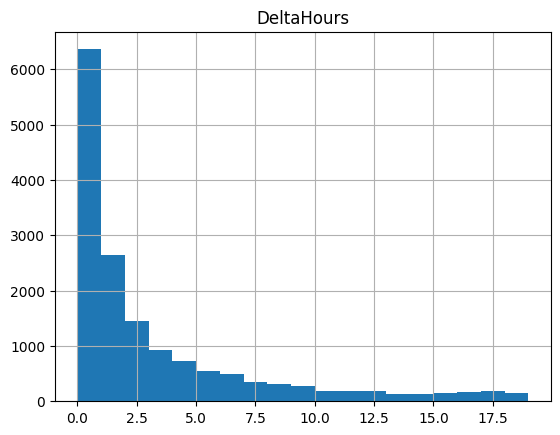

In [83]:
count = (final_cso_df['DeltaHours'] > 20).sum()

filtered_df = final_cso_df[(final_cso_df['DeltaHours'] >= 0) & (final_cso_df['DeltaHours'] <= 20)]
filtered_df.hist(column='DeltaHours', bins=np.arange(0, 20, 1))

print(f'Values > 20: {count}')
print(f'Values <= 20: {filtered_df.shape[0]}')

print(f'% Values > 20: {100 * count / final_cso_df.shape[0]}')

In [85]:
final_cso_df.shape[0]

18165

Values > 20: 1175
Values <= 20: 11016
% Values > 20: 9.638257731113116


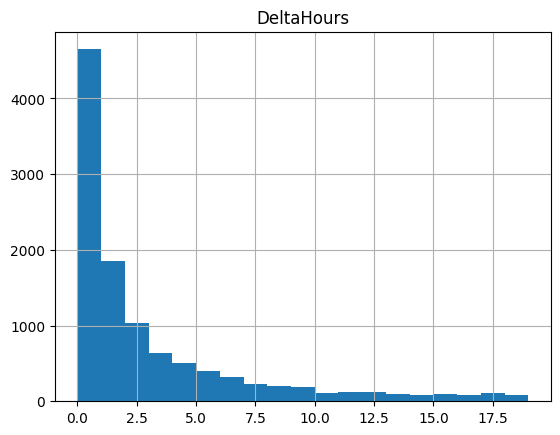

In [84]:
count = (final_group_cso_df['DeltaHours'] > 20).sum()

filtered_df = final_group_cso_df[(final_group_cso_df['DeltaHours'] >= 0) & (final_group_cso_df['DeltaHours'] <= 20)]
filtered_df.hist(column='DeltaHours', bins=np.arange(0, 20, 1))

print(f'Values > 20: {count}')
print(f'Values <= 20: {filtered_df.shape[0]}')

print(f'% Values > 20: {100 * count / final_group_cso_df.shape[0]}')

# WIP

In [3]:
csos = pd.read_csv("/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/sites/all_overflows.csv")

In [6]:
csos

,Unnamed: 0,Lat,Lon
0,(Northern) Low Level No 1 Brook Green,51.488921,-0.229225
1,Abbess Roding,51.776298,0.282698
2,Abbey Mills,51.530104,0.000312
3,Abingdon,51.652445,-1.288356
4,Acton & Storm Works,51.505945,-0.255079
...,...,...,...
441,"Bushey Court, Raynes Park",51.414950,-0.249630
442,Eastcote Avenue,51.548785,-0.294257
443,Kingston Main,51.413192,-0.307505
444,"Millbank, Crawley",51.114097,-0.222732


In [11]:
prova = csos.merge(left_on=['Lat', 'Lon'], right_on=['Lat', 'Lon'], right=csos[['Lat', 'Lon']].value_counts().reset_index(name='count'), how='outer')
# csos[['Lat', 'Lon']].value_counts().reset_index(name='count')

In [14]:
prova[prova["count"] > 1].to_csv("/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/sites/all_overflows_duplicates.csv", index=False)